In [1]:
# Basic data manipulation and analysis
import pandas as pd

# Numerical operations (used for statistics)
import numpy as np

# Data visualization
import matplotlib.pyplot as plt

# Make plots display inside the notebook
%matplotlib inline

In [2]:
# Loading the main dataset
file_path = '../data/raw/sales_data.csv'
df = pd.read_csv(file_path)

# Show the first 5 rows of the table
df.head()

,date,product,units_sold,unit_price,revenue,leads,mql,sql,opportunities,conversion_rate,cpl,marketing_spend,cac
0,2024-01-01,Leadership Mastery,71,1500,106500,470,220,127,44,1.6136,11.43,5372.98,75.68
1,2024-01-01,High-Performance Communication,94,2500,235000,287,100,44,21,4.4762,9.24,2652.18,28.21
2,2024-01-01,Strategic Thinking,107,3000,321000,613,192,87,30,3.5667,14.69,9007.01,84.18
3,2024-01-01,Executive Presence,41,1500,61500,947,243,135,56,0.7321,9.03,8548.23,208.49
4,2024-01-01,Negotiation for Executives,79,3000,237000,982,379,240,86,0.9186,19.31,18965.52,240.07


In [3]:
df.shape

(60, 13)

In [4]:
df.columns

Index(['date', 'product', 'units_sold', 'unit_price', 'revenue', 'leads',
       'mql', 'sql', 'opportunities', 'conversion_rate', 'cpl',
       'marketing_spend', 'cac'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             60 non-null     object 
 1   product          60 non-null     object 
 2   units_sold       60 non-null     int64  
 3   unit_price       60 non-null     int64  
 4   revenue          60 non-null     int64  
 5   leads            60 non-null     int64  
 6   mql              60 non-null     int64  
 7   sql              60 non-null     int64  
 8   opportunities    60 non-null     int64  
 9   conversion_rate  60 non-null     float64
 10  cpl              60 non-null     float64
 11  marketing_spend  60 non-null     float64
 12  cac              60 non-null     float64
dtypes: float64(4), int64(7), object(2)
memory usage: 6.2+ KB


In [6]:
df.describe()

,units_sold,unit_price,revenue,leads,mql,sql,opportunities,conversion_rate,cpl,marketing_spend,cac
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,65.716667,2258.333333,148691.666667,688.466667,275.666667,149.050000,66.016667,1.395325,18.698000,12958.179500,254.397500
std,28.225539,592.979168,79068.308361,286.574951,124.505621,72.979083,36.688562,1.197612,6.224641,7121.200904,227.561013
min,20.000000,1500.000000,40500.000000,201.000000,60.000000,31.000000,11.000000,0.301700,8.290000,2652.180000,28.210000
25%,42.750000,1500.000000,91500.000000,400.750000,176.250000,93.750000,38.750000,0.581150,13.610000,6051.480000,89.742500
50%,66.000000,2000.000000,127000.000000,722.000000,246.000000,136.000000,56.500000,0.922550,19.275000,11863.625000,219.645000
75%,83.000000,3000.000000,191875.000000,893.500000,384.250000,205.250000,86.250000,1.884225,23.540000,19002.877500,323.137500
max,118.000000,3000.000000,354000.000000,1180.000000,604.000000,313.000000,171.000000,6.750000,29.410000,33934.790000,1429.500000


In [7]:
df.isnull().sum()

date               0
product            0
units_sold         0
unit_price         0
revenue            0
leads              0
mql                0
sql                0
opportunities      0
conversion_rate    0
cpl                0
marketing_spend    0
cac                0
dtype: int64

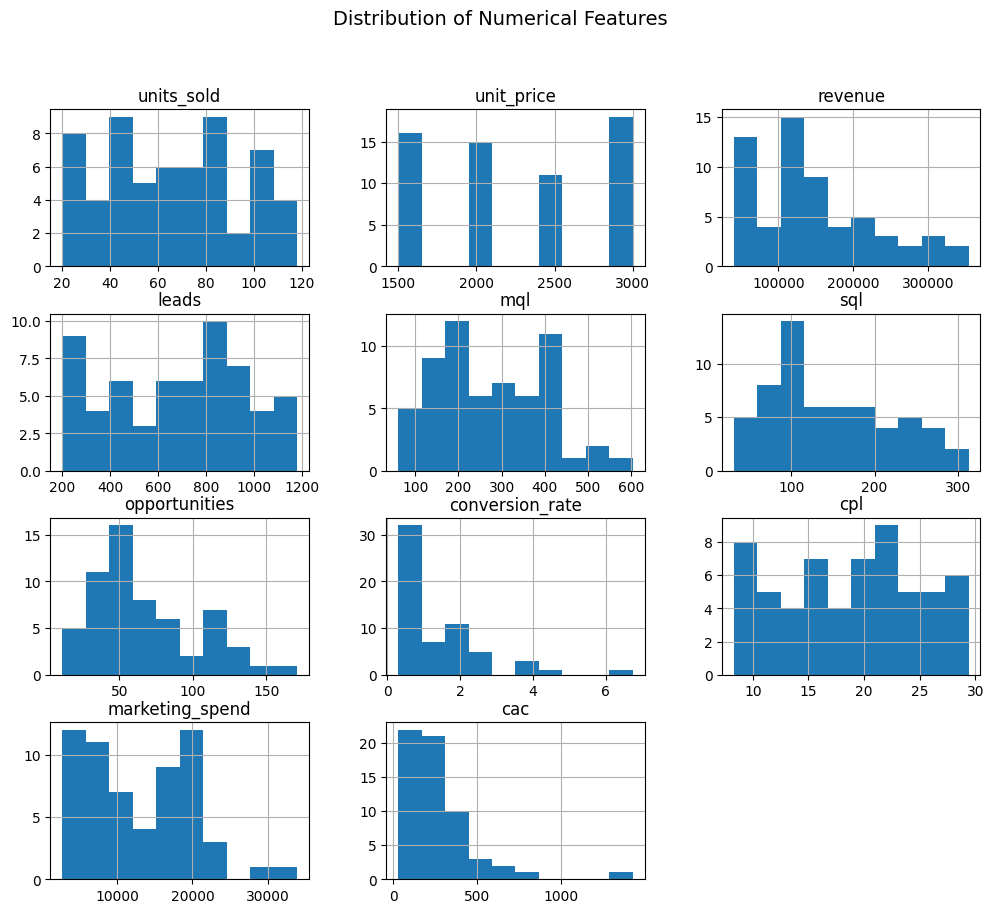

In [8]:
df.hist(figsize=(12, 10))
plt.suptitle("Distribution of Numerical Features", fontsize=14)
plt.show()

In [9]:
df['lead_source'].value_counts()

KeyError: 'lead_source'